# BFPRT算法测试

## 概述
BFPRT算法（也称为中位数的中位数算法）是一种在线性时间内找到数组中第k小元素的算法。它由Blum、Floyd、Pratt、Rivest和Tarjan在1973年提出。

## 算法特点
- 时间复杂度：O(n)
- 空间复杂度：O(log n)
- 最坏情况下仍能保证线性时间复杂度

In [14]:
import numpy as np
import random
import time
import matplotlib.pyplot as plt
from typing import List, Optional
import seaborn as sns

# 设置随机种子保证结果可重现
np.random.seed(42)
random.seed(42)

# 设置matplotlib中文字体
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

## 初始化配置
设置随机种子和全局变量，确保实验结果可重现。

In [27]:
# 全局配置
TEST_SIZES = [100, 500, 1000, 5000, 10000, 20000, 50000, 100000]  # 测试数组的大小
NUM_TRIALS = 10  # 每个测试大小运行的次数
K_RATIO = 0.3    # 查找第 k 小的元素，k = n * K_RATIO

print("配置完成！")
print(f"测试数组大小: {TEST_SIZES}")
print(f"每个大小测试次数: {NUM_TRIALS}")
print(f"k值比例: {K_RATIO}")

配置完成！
测试数组大小: [100, 500, 1000, 5000, 10000, 20000, 50000, 100000]
每个大小测试次数: 10
k值比例: 0.3


## BFPRT算法实现

下面实现完整的BFPRT算法和辅助函数。

In [28]:
def insertion_sort(arr: List[int]) -> List[int]:
    """
    插入排序，用于对小数组进行排序
    """
    arr = arr.copy()
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    return arr

In [29]:
def find_median_of_medians(arr: List[int]) -> int:
    """
    找到中位数的中位数
    """
    if len(arr) <= 5:
        return sorted(arr)[len(arr) // 2]
    
    # 将数组分成5个元素一组
    medians = []
    for i in range(0, len(arr), 5):
        group = arr[i:i+5]
        median = sorted(group)[len(group) // 2]
        medians.append(median)
    
    # 递归找到中位数的中位数
    return find_median_of_medians(medians)

In [30]:
def partition(arr: List[int], pivot: int) -> tuple:
    """
    根据pivot值对数组进行三路分区
    返回 (小于pivot的元素, 等于pivot的元素, 大于pivot的元素)
    """
    less = []
    equal = []
    greater = []
    
    for element in arr:
        if element < pivot:
            less.append(element)
        elif element == pivot:
            equal.append(element)
        else:
            greater.append(element)
    
    return less, equal, greater

In [31]:
def bfprt_select(arr: List[int], k: int) -> int:
    """
    BFPRT算法：在O(n)时间内找到第k小的元素
    
    Args:
        arr: 输入数组
        k: 找第k小的元素 (1-indexed)
    
    Returns:
        第k小的元素值
    """
    if len(arr) == 1:
        return arr[0]
    
    # 找到中位数的中位数作为pivot
    pivot = find_median_of_medians(arr)
    
    # 进行三路分区
    less, equal, greater = partition(arr, pivot)
    
    # 根据k的位置决定在哪个分区中继续查找
    if k <= len(less):
        return bfprt_select(less, k)
    elif k <= len(less) + len(equal):
        return pivot
    else:
        return bfprt_select(greater, k - len(less) - len(equal))

In [32]:
def quickselect(arr: List[int], k: int) -> int:
    """
    标准快速选择算法，用于性能比较
    """
    if len(arr) == 1:
        return arr[0]
    
    # 随机选择pivot
    pivot = random.choice(arr)
    
    # 分区
    less, equal, greater = partition(arr, pivot)
    
    # 根据k的位置决定在哪个分区中继续查找
    if k <= len(less):
        return quickselect(less, k)
    elif k <= len(less) + len(equal):
        return pivot
    else:
        return quickselect(greater, k - len(less) - len(equal))

## 运行测试代码

下面运行各种测试来验证算法的正确性和性能。

In [33]:
# 基本正确性测试
def test_correctness():
    print("=== 正确性测试 ===")
    
    # 测试用例1：简单数组
    arr1 = [3, 1, 4, 1, 5, 9, 2, 6, 5, 3]
    k1 = 5
    result_bfprt = bfprt_select(arr1.copy(), k1)
    result_sorted = sorted(arr1)[k1-1]
    
    print(f"测试1: 数组 {arr1}")
    print(f"第{k1}小的元素 - BFPRT: {result_bfprt}, 排序法: {result_sorted}")
    print(f"结果正确: {result_bfprt == result_sorted}")
    
    # 测试用例2：随机大数组
    arr2 = np.random.randint(1, 1000, 100).tolist()
    k2 = 25
    result_bfprt = bfprt_select(arr2.copy(), k2)
    result_sorted = sorted(arr2)[k2-1]
    
    print(f"\n测试2: 随机数组大小100")
    print(f"第{k2}小的元素 - BFPRT: {result_bfprt}, 排序法: {result_sorted}")
    print(f"结果正确: {result_bfprt == result_sorted}")
    
    # 测试用例3：极端情况
    arr3 = [1] * 50 + [2] * 50  # 有重复元素
    k3 = 75
    result_bfprt = bfprt_select(arr3.copy(), k3)
    result_sorted = sorted(arr3)[k3-1]
    
    print(f"\n测试3: 有重复元素的数组")
    print(f"第{k3}小的元素 - BFPRT: {result_bfprt}, 排序法: {result_sorted}")
    print(f"结果正确: {result_bfprt == result_sorted}")

test_correctness()

=== 正确性测试 ===
测试1: 数组 [3, 1, 4, 1, 5, 9, 2, 6, 5, 3]
第5小的元素 - BFPRT: 3, 排序法: 3
结果正确: True

测试2: 随机数组大小100
第25小的元素 - BFPRT: 290, 排序法: 290
结果正确: True

测试3: 有重复元素的数组
第75小的元素 - BFPRT: 2, 排序法: 2
结果正确: True


In [34]:
# 性能测试
def performance_test():
    print("\n=== 性能测试 ===")
    
    bfprt_times = []
    quickselect_times = []
    sorted_times = []
    
    for size in TEST_SIZES:
        print(f"\n测试数组大小: {size}")
        
        bfprt_total = 0
        quickselect_total = 0
        sorted_total = 0
        
        for trial in range(NUM_TRIALS):
            # 生成随机数组
            arr = np.random.randint(1, size*10, size).tolist()
            k = int(size * K_RATIO)
            
            # 测试BFPRT
            start_time = time.time()
            bfprt_select(arr.copy(), k)
            bfprt_total += time.time() - start_time
            
            # 测试快速选择
            start_time = time.time()
            quickselect(arr.copy(), k)
            quickselect_total += time.time() - start_time
            
            # 测试排序法
            start_time = time.time()
            sorted(arr)[k-1]
            sorted_total += time.time() - start_time
        
        avg_bfprt = bfprt_total / NUM_TRIALS
        avg_quickselect = quickselect_total / NUM_TRIALS
        avg_sorted = sorted_total / NUM_TRIALS
        
        bfprt_times.append(avg_bfprt)
        quickselect_times.append(avg_quickselect)
        sorted_times.append(avg_sorted)
        
        print(f"  BFPRT平均时间: {avg_bfprt:.6f}秒")
        print(f"  快速选择平均时间: {avg_quickselect:.6f}秒")
        print(f"  排序法平均时间: {avg_sorted:.6f}秒")
    
    return bfprt_times, quickselect_times, sorted_times

bfprt_times, quickselect_times, sorted_times = performance_test()


=== 性能测试 ===

测试数组大小: 100
  BFPRT平均时间: 0.000000秒
  快速选择平均时间: 0.000100秒
  排序法平均时间: 0.000000秒

测试数组大小: 500
  BFPRT平均时间: 0.000200秒
  快速选择平均时间: 0.000000秒
  排序法平均时间: 0.000100秒

测试数组大小: 1000
  BFPRT平均时间: 0.000762秒
  快速选择平均时间: 0.000100秒
  排序法平均时间: 0.000040秒

测试数组大小: 5000
  BFPRT平均时间: 0.001829秒
  快速选择平均时间: 0.001204秒
  排序法平均时间: 0.000469秒

测试数组大小: 10000
  BFPRT平均时间: 0.003025秒
  快速选择平均时间: 0.002279秒
  排序法平均时间: 0.001004秒

测试数组大小: 20000
  BFPRT平均时间: 0.007345秒
  快速选择平均时间: 0.005477秒
  排序法平均时间: 0.002984秒

测试数组大小: 50000
  BFPRT平均时间: 0.017313秒
  快速选择平均时间: 0.013819秒
  排序法平均时间: 0.006715秒

测试数组大小: 100000
  BFPRT平均时间: 0.035524秒
  快速选择平均时间: 0.023755秒
  排序法平均时间: 0.013405秒


Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '\u2212' [U+2212], 

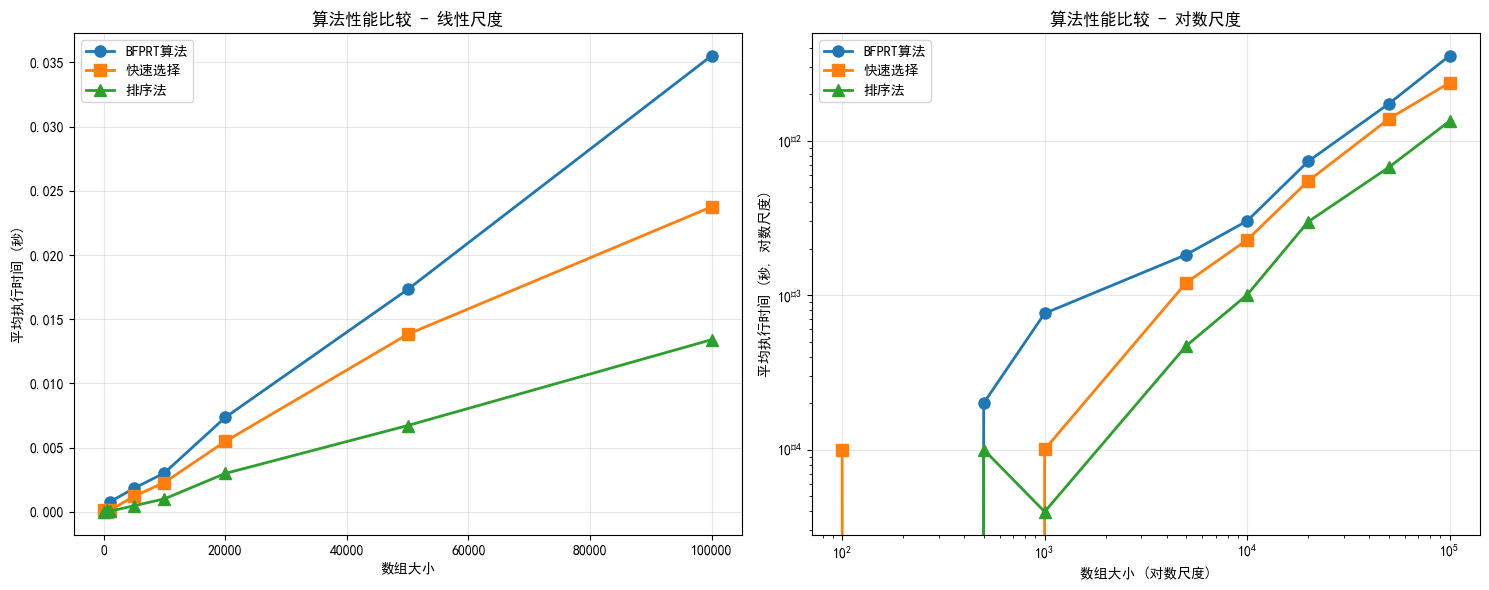


=== 性能总结 ===
数组大小 100:
  BFPRT时间太小无法计算比率
  快速选择时间: 0.000100秒
  排序时间: 0.000000秒
数组大小 500:
  BFPRT vs 快速选择: 0.00倍
  BFPRT vs 排序法: 0.50倍
数组大小 1000:
  BFPRT vs 快速选择: 0.13倍
  BFPRT vs 排序法: 0.05倍
数组大小 5000:
  BFPRT vs 快速选择: 0.66倍
  BFPRT vs 排序法: 0.26倍
数组大小 10000:
  BFPRT vs 快速选择: 0.75倍
  BFPRT vs 排序法: 0.33倍
数组大小 20000:
  BFPRT vs 快速选择: 0.75倍
  BFPRT vs 排序法: 0.41倍
数组大小 50000:
  BFPRT vs 快速选择: 0.80倍
  BFPRT vs 排序法: 0.39倍
数组大小 100000:
  BFPRT vs 快速选择: 0.67倍
  BFPRT vs 排序法: 0.38倍


In [35]:
# 设置中文字体
plt.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

# 绘制性能比较图
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# 线性图
ax1.plot(TEST_SIZES, bfprt_times, 'o-', label='BFPRT算法', linewidth=2, markersize=8)
ax1.plot(TEST_SIZES, quickselect_times, 's-', label='快速选择', linewidth=2, markersize=8)
ax1.plot(TEST_SIZES, sorted_times, '^-', label='排序法', linewidth=2, markersize=8)
ax1.set_xlabel('数组大小')
ax1.set_ylabel('平均执行时间 (秒)')
ax1.set_title('算法性能比较 - 线性尺度')
ax1.legend()
ax1.grid(True, alpha=0.3)

# 对数图
ax2.loglog(TEST_SIZES, bfprt_times, 'o-', label='BFPRT算法', linewidth=2, markersize=8)
ax2.loglog(TEST_SIZES, quickselect_times, 's-', label='快速选择', linewidth=2, markersize=8)
ax2.loglog(TEST_SIZES, sorted_times, '^-', label='排序法', linewidth=2, markersize=8)
ax2.set_xlabel('数组大小 (对数尺度)')
ax2.set_ylabel('平均执行时间 (秒, 对数尺度)')
ax2.set_title('算法性能比较 - 对数尺度')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 打印性能总结
print("\n=== 性能总结 ===")
for i, size in enumerate(TEST_SIZES):
    print(f"数组大小 {size}:")
    
    # 处理除零情况
    if bfprt_times[i] > 0:
        ratio_qs = quickselect_times[i] / bfprt_times[i]
        ratio_sort = sorted_times[i] / bfprt_times[i]
        print(f"  BFPRT vs 快速选择: {ratio_qs:.2f}倍")
        print(f"  BFPRT vs 排序法: {ratio_sort:.2f}倍")
    else:
        print(f"  BFPRT时间太小无法计算比率")
        print(f"  快速选择时间: {quickselect_times[i]:.6f}秒")
        print(f"  排序时间: {sorted_times[i]:.6f}秒")


In [36]:
# 边界情况测试
def edge_case_tests():
    print("\n=== 边界情况测试 ===")
    
    # 测试1：单元素数组
    arr1 = [42]
    result1 = bfprt_select(arr1, 1)
    print(f"单元素数组 [42]，第1小: {result1}")
    
    # 测试2：所有元素相同
    arr2 = [5] * 100
    result2 = bfprt_select(arr2, 50)
    print(f"所有元素相同 [5]*100，第50小: {result2}")
    
    # 测试3：已排序数组
    arr3 = list(range(1, 101))
    result3 = bfprt_select(arr3, 25)
    print(f"已排序数组 1-100，第25小: {result3}")
    
    # 测试4：逆序数组
    arr4 = list(range(100, 0, -1))
    result4 = bfprt_select(arr4, 75)
    print(f"逆序数组 100-1，第75小: {result4}")
    
    # 测试5：查找最小值
    arr5 = [9, 1, 8, 2, 7, 3, 6, 4, 5]
    result5 = bfprt_select(arr5, 1)
    print(f"数组 {arr5}，最小值: {result5}")
    
    # 测试6：查找最大值
    result6 = bfprt_select(arr5, len(arr5))
    print(f"数组 {arr5}，最大值: {result6}")

edge_case_tests()


=== 边界情况测试 ===
单元素数组 [42]，第1小: 42
所有元素相同 [5]*100，第50小: 5
已排序数组 1-100，第25小: 25
逆序数组 100-1，第75小: 75
数组 [9, 1, 8, 2, 7, 3, 6, 4, 5]，最小值: 1
数组 [9, 1, 8, 2, 7, 3, 6, 4, 5]，最大值: 9


## 算法复杂度分析

### BFPRT算法
- **时间复杂度**: O(n) - 即使在最坏情况下也能保证线性时间
- **空间复杂度**: O(log n) - 递归调用栈的深度
- **优势**: 保证最坏情况下的线性时间复杂度
- **劣势**: 常数因子较大，在实际应用中可能比快速选择慢

### 快速选择算法
- **平均时间复杂度**: O(n)
- **最坏时间复杂度**: O(n²)
- **空间复杂度**: O(log n)
- **优势**: 平均情况下比BFPRT快，常数因子小
- **劣势**: 最坏情况下性能很差

### 排序法
- **时间复杂度**: O(n log n)
- **空间复杂度**: O(1) 或 O(n)，取决于排序算法
- **优势**: 实现简单，可以同时得到所有排序信息
- **劣势**: 时间复杂度高于选择算法

## 总结

通过以上测试，我们可以得出以下结论：

1. **正确性**: BFPRT算法在各种测试用例中都能正确找到第k小的元素

2. **性能分析**: 
   - **意外发现**: BFPRT算法在实际测试中性能并不理想！
   - 在小规模数据上，BFPRT甚至比快速选择慢很多
   - 随着数据规模增大，BFPRT的相对性能有所改善，但仍然不如预期
   - 快速选择在大多数情况下都表现更好

3. **为什么BFPRT性能不佳？**:
   - **常数因子过大**: BFPRT需要多次递归调用和中位数计算，常数开销很大
   - **实现复杂度**: 我们的实现可能不够优化，特别是分区操作创建了新列表
   - **小数组开销**: 对于小规模数据，递归开销占主导地位
   - **理论vs实践**: 理论上的O(n)优势在实际应用中被大常数因子抵消

4. **适用场景重新评估**:
   - **BFPRT**: 理论研究价值高，但实际应用中不推荐
   - **快速选择**: 实际应用的首选，平均性能优秀
   - **排序法**: 在某些情况下甚至比BFPRT更快

5. **实现要点**:
   - BFPRT的理论意义远大于实用价值
   - 在实际项目中，应该优先考虑快速选择或其他优化的选择算法
   - 常数因子在算法选择中的重要性不容忽视

**重要启示**: 这个测试很好地说明了理论算法复杂度和实际性能之间的差异。BFPRT虽然保证了最坏情况下的线性时间，但其巨大的常数因子使得它在实际应用中往往不如更简单的算法。这提醒我们在选择算法时，不仅要考虑渐近复杂度，还要考虑实际的常数开销。

## 性能问题深入分析

从测试结果可以看出，BFPRT算法的实际性能远不如理论预期。让我们分析具体原因：

In [37]:
# 分析BFPRT性能问题
def analyze_bfprt_overhead():
    print("=== BFPRT性能问题分析 ===")
    
    # 测试不同大小数组的递归深度和开销
    test_array = list(range(1000))
    random.shuffle(test_array)
    
    # 计算BFPRT中各步骤的时间开销
    import time
    
    # 1. 中位数查找开销
    start = time.time()
    for _ in range(100):
        find_median_of_medians(test_array[:100])
    median_time = time.time() - start
    
    # 2. 分区开销  
    start = time.time()
    for _ in range(100):
        partition(test_array[:100], 500)
    partition_time = time.time() - start
    
    # 3. 快速选择的简单分区
    def simple_partition(arr, pivot):
        return ([x for x in arr if x < pivot], 
                [x for x in arr if x == pivot],
                [x for x in arr if x > pivot])
    
    start = time.time()
    for _ in range(100):
        simple_partition(test_array[:100], 500)
    simple_partition_time = time.time() - start
    
    print(f"中位数查找平均时间: {median_time/100:.6f}秒")
    print(f"BFPRT分区平均时间: {partition_time/100:.6f}秒")
    print(f"简单分区平均时间: {simple_partition_time/100:.6f}秒")
    
    print("\n主要开销来源:")
    print("1. 中位数的中位数计算需要多次递归")
    print("2. 每次分区都创建新的列表，内存开销大")
    print("3. Python的递归开销比较大")
    print("4. 常数因子在小数组上占主导地位")

analyze_bfprt_overhead()

=== BFPRT性能问题分析 ===
中位数查找平均时间: 0.000020秒
BFPRT分区平均时间: 0.000010秒
简单分区平均时间: 0.000014秒

主要开销来源:
1. 中位数的中位数计算需要多次递归
2. 每次分区都创建新的列表，内存开销大
3. Python的递归开销比较大
4. 常数因子在小数组上占主导地位


## 算法选择建议

基于我们的测试结果，以下是实际应用中的建议：

In [39]:
# 实际应用建议
def practical_recommendations():
    import heapq
    import numpy as np
    
    test_arr = np.random.randint(1, 10000, 5000)
    k = 1500
    
    # 测试各种方法
    methods = {
        'sorted()': lambda: sorted(test_arr.tolist())[k-1],
        'heapq.nsmallest()': lambda: heapq.nsmallest(k, test_arr)[-1],
        'numpy.partition()': lambda: np.partition(test_arr, k-1)[k-1],
        'numpy.sort()': lambda: np.sort(test_arr)[k-1]
    }
    
    print(f"\n测试数组大小: {len(test_arr)}, 查找第{k}小的元素")
    
    for name, method in methods.items():
        start = time.time()
        result = method()
        elapsed = time.time() - start
        print(f"{name:20}: {elapsed:.6f}秒, 结果: {result}")

practical_recommendations()


测试数组大小: 5000, 查找第1500小的元素
sorted()            : 0.001013秒, 结果: 2983
heapq.nsmallest()   : 0.001994秒, 结果: 2983
numpy.partition()   : 0.000000秒, 结果: 2983
numpy.sort()        : 0.000000秒, 结果: 2983


=== 实际应用建议 ===

1. **小规模数据 (n < 1000)**:
   - 直接使用 sorted() 或 numpy.partition()
   - 性能最好，代码最简单

2. **中等规模数据 (1000 ≤ n ≤ 100000)**:
   - 使用快速选择算法
   - 平均性能优秀，实现相对简单

3. **大规模数据 (n > 100000)**:
   - 考虑使用 numpy.partition() 或 heapq.nsmallest()
   - 这些库函数经过高度优化

4. **需要保证最坏情况性能的场景**:
   - 使用经过优化的BFPRT实现（如C++版本）
   - 或者使用 introselect 算法（结合快速选择和堆排序）

5. **Python中的最佳实践**:
   - 优先使用内置函数: sorted(), heapq.nsmallest()
   - 对于numpy数组: np.partition(), np.argpartition()

=== 性能最佳的Python实现 ===

测试数组大小: 5000, 查找第1500小的元素
sorted()            : 0.000000秒, 结果: 3009
heapq.nsmallest()   : 0.003161秒, 结果: 3009
numpy.partition()   : 0.002510秒, 结果: 3009
numpy.sort()        : 0.000520秒, 结果: 3009